In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv("data/company.csv")

In [70]:
data

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
...,...,...,...,...,...
144,Infosys,22.0,8787.0,Calcutta,India
145,Infosys,44.0,4034.0,Delhi,India
146,TCS,33.0,5034.0,Mumbai,India
147,Infosys,22.0,8202.0,Cochin,India


In [71]:
data.head()

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India


In [72]:
data.tail()

,Company,Age,Salary,Place,Country
144,Infosys,22.0,8787.0,Calcutta,India
145,Infosys,44.0,4034.0,Delhi,India
146,TCS,33.0,5034.0,Mumbai,India
147,Infosys,22.0,8202.0,Cochin,India
148,NaN,NaN,NaN,NaN,NaN


In [73]:
data.shape

(149, 5)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.9+ KB


In [75]:
data.describe()

,Age,Salary
count,130.000000,124.000000
mean,30.484615,5312.467742
std,11.096640,2573.764683
min,0.000000,1089.000000
25%,22.000000,3030.000000
50%,32.500000,5000.000000
75%,37.750000,8000.000000
max,54.000000,9876.000000


In [76]:
data[["Age","Salary"]]

,Age,Salary
0,20.0,NaN
1,30.0,NaN
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
144,22.0,8787.0
145,44.0,4034.0
146,33.0,5034.0
147,22.0,8202.0


In [77]:
data.rename(columns={"Company":"Organization"}, inplace = True)

In [78]:
data

,Organization,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
...,...,...,...,...,...
144,Infosys,22.0,8787.0,Calcutta,India
145,Infosys,44.0,4034.0,Delhi,India
146,TCS,33.0,5034.0,Mumbai,India
147,Infosys,22.0,8202.0,Cochin,India


In [79]:
data["Organization"].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [80]:
data["Organization"].value_counts()

TCS                          53
Infosys                      45
CTS                          36
Congnizant                    2
Infosys Pvt Lmt               2
Tata Consultancy Services     2
Name: Organization, dtype: int64

In [81]:
data["Organization"].replace({'Infosys Pvt Lmt':'Infosys', 'Congnizant':'CTS','Tata Consultancy Services':'TCS'},inplace=True)

In [82]:
data["Organization"].value_counts()

TCS        55
Infosys    47
CTS        38
Name: Organization, dtype: int64

In [83]:
data

,Organization,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
...,...,...,...,...,...
144,Infosys,22.0,8787.0,Calcutta,India
145,Infosys,44.0,4034.0,Delhi,India
146,TCS,33.0,5034.0,Mumbai,India
147,Infosys,22.0,8202.0,Cochin,India


In [84]:
data.duplicated().sum()

8

In [85]:
data.drop_duplicates(inplace = True)

In [86]:
data.shape

(141, 5)

In [87]:
data[data['Organization'].isnull()]

,Organization,Age,Salary,Place,Country
37,NaN,35.0,NaN,Hyderabad,India
51,NaN,24.0,3000.0,Mumbai,India
61,NaN,25.0,8943.0,NaN,India
64,NaN,25.0,6543.0,Noida,India
109,NaN,33.0,NaN,Calcutta,India
123,NaN,NaN,3454.0,Calcutta,India
133,NaN,22.0,8943.0,Chennai,India
136,NaN,NaN,NaN,Delhi,India
148,NaN,NaN,NaN,NaN,NaN


In [88]:
data.dropna(subset=["Organization"], inplace = True)

In [89]:
data.shape

(132, 5)

In [90]:
data[data['Place'].isnull()]

,Organization,Age,Salary,Place,Country
33,TCS,36.0,5034.0,NaN,India
34,Infosys,26.0,8202.0,NaN,India
35,TCS,35.0,9024.0,NaN,India
41,Infosys,NaN,5000.0,NaN,India
42,TCS,NaN,6000.0,NaN,India
43,Infosys,25.0,7000.0,NaN,India
62,TCS,36.0,8345.0,NaN,India
63,CTS,41.0,9284.0,NaN,India
116,TCS,33.0,8787.0,NaN,India
117,CTS,44.0,9876.0,NaN,India


In [91]:
data.dropna(subset=["Place"], inplace = True)

In [92]:
data.shape

(119, 5)

In [93]:
data[data['Salary'].isnull()].shape

(19, 5)

In [94]:
data.dropna(subset=["Salary"], inplace = True)

In [95]:
data.shape

(100, 5)

In [96]:
data["Age"].fillna(data["Age"].median(), inplace = True)

In [97]:
data

,Organization,Age,Salary,Place,Country
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
5,Infosys,33.0,5000.0,Calcutta,India
6,TCS,33.0,6000.0,Chennai,India
...,...,...,...,...,...
139,CTS,22.0,2934.0,Noida,India
140,Infosys,44.0,4034.0,Hyderabad,India
141,TCS,33.0,5034.0,Calcutta,India
142,Infosys,22.0,8202.0,Mumbai,India


<AxesSubplot:ylabel='Frequency'>

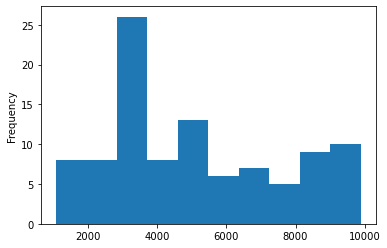

In [98]:
data["Salary"].plot(kind = "hist")

In [99]:
data["Organization"].value_counts()

TCS        40
Infosys    35
CTS        25
Name: Organization, dtype: int64

<AxesSubplot:ylabel='Organization'>

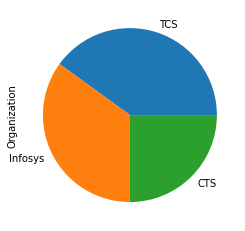

In [100]:
data["Organization"].value_counts().plot(kind = "pie")

In [101]:
data.groupby("Organization").Salary.mean()

Organization
CTS        4183.160000
Infosys    4954.314286
TCS        5429.125000
Name: Salary, dtype: float64

In [102]:
data

,Organization,Age,Salary,Place,Country
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
5,Infosys,33.0,5000.0,Calcutta,India
6,TCS,33.0,6000.0,Chennai,India
...,...,...,...,...,...
139,CTS,22.0,2934.0,Noida,India
140,Infosys,44.0,4034.0,Hyderabad,India
141,TCS,33.0,5034.0,Calcutta,India
142,Infosys,22.0,8202.0,Mumbai,India


In [103]:
x = data[["Age"]]
y = data["Salary"]

In [104]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [105]:
data.shape

(100, 5)

In [106]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((70, 1), (30, 1), (70,), (30,))

<AxesSubplot:xlabel='Age', ylabel='Salary'>

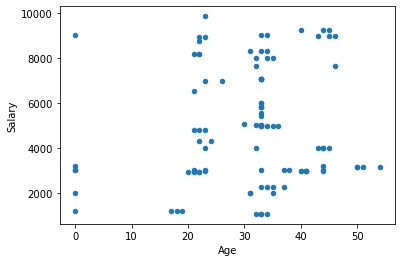

In [107]:
data.plot(kind = "scatter", x = "Age", y = "Salary")

In [108]:
model = LinearRegression()

In [109]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
model.intercept_

4328.5121667607655

In [111]:
model.coef_

array([14.56340319])

<AxesSubplot:xlabel='Age', ylabel='Salary'>

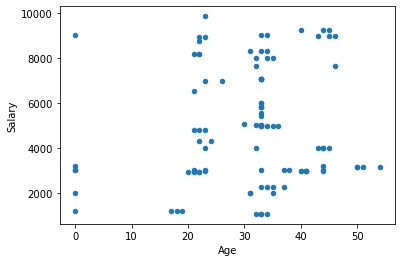

In [112]:
data.plot(kind = "scatter", x = "Age", y = "Salary")

In [113]:
pred_train = model.predict(train_x)

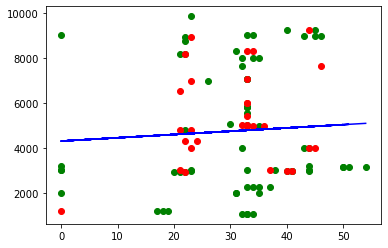

In [114]:
plt.scatter(train_x,train_y, color = "green")
plt.scatter(test_x,test_y, color = "red")
plt.plot(train_x,pred_train, 'b' )

In [115]:
pred_test = model.predict(test_x)

In [116]:
print("Train - MSE",mean_squared_error(train_y, pred_train))
print("Test - MSE",mean_squared_error(test_y, pred_test))
print("Train - MAE",mean_absolute_error(train_y, pred_train))
print("Test - MAE",mean_absolute_error(test_y, pred_test))
print("Train - R2 Score",r2_score(train_y, pred_train))
print("Test - R2 Score",r2_score(test_y, pred_test))

Train - MSE 7384126.488947654
Test - MSE 4249461.498235764
Train - MAE 2417.3320495872836
Test - MAE 1599.9073467089015
Train - R2 Score 0.004166650336120958
Test - R2 Score -0.05564555836554885


In [117]:
# with organization as dummy variables columns

In [118]:
data_Org = pd.get_dummies(data["Organization"])

In [119]:
data_new = pd.concat([data_Org,data[["Age","Salary"]]], axis = 1)

In [120]:
x_new = data_new.drop(columns="Salary")


In [121]:
y_new = data_new["Salary"]

In [122]:
train_x_new, test_x_new, train_y_new, test_y_new = train_test_split(x_new, y_new, test_size = 0.3, random_state = 4)

data.shape

(100, 5)

In [123]:
train_x_new.shape, test_x_new.shape, train_y_new.shape, test_y_new.shape

((70, 4), (30, 4), (70,), (30,))

In [124]:
model = LinearRegression()
model.fit(train_x_new, train_y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
model.intercept_

4278.434189918446

In [126]:
model.coef_

array([-757.67908418,   88.27677258,  669.40231159,   15.09041579])

In [127]:
pred_train_new = model.predict(train_x_new)
pred_test_new = model.predict(test_x_new)

In [128]:
print("Train - MSE",mean_squared_error(train_y_new, pred_train_new))
print("Test - MSE",mean_squared_error(test_y_new, pred_test_new))
print("Train - MAE",mean_absolute_error(train_y_new, pred_train_new))
print("Test - MAE",mean_absolute_error(test_y_new, pred_test_new))
print("Train - R2 Score",r2_score(train_y_new, pred_train_new))
print("Test - R2 Score",r2_score(test_y_new, pred_test_new))

Train - MSE 7056664.351239141
Test - MSE 4154722.0392291606
Train - MAE 2319.853753314119
Test - MAE 1608.1404059933716
Train - R2 Score 0.04832863997300707
Test - R2 Score -0.032110508302429785
